In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

df = pd.read_csv("../data/CAR DETAILS FROM CAR DEKHO.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [2]:
df = df.copy()


if "name" in df.columns:
    df.drop(columns=["name"], inplace=True)

# Handle missing values (if any)
df = df.dropna()

# Encode categorical columns
cat_cols = df.select_dtypes(include=["object"]).columns
le = LabelEncoder()
for c in cat_cols:
    df[c] = le.fit_transform(df[c].astype(str))

# Scale
scaler = StandardScaler()
X = scaler.fit_transform(df)

df.shape, X.shape


((4340, 7), (4340, 7))

In [ ]:
scores = {}

# KMeans 
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
k_labels = kmeans.fit_predict(X)
scores["KMeans"] = silhouette_score(X, k_labels)

# DBSCAN 
dbscan = DBSCAN(eps=0.6, min_samples=6)
d_labels = dbscan.fit_predict(X)

# Silhouette 
if len(set(d_labels)) > 1 and (len(set(d_labels)) - (1 if -1 in d_labels else 0)) >= 2:
    scores["DBSCAN"] = silhouette_score(X, d_labels)
else:
    scores["DBSCAN"] = None

# GMM
gmm = GaussianMixture(n_components=3, random_state=42)
g_labels = gmm.fit_predict(X)
scores["GMM"] = silhouette_score(X, g_labels)

scores


{'KMeans': 0.22090538758699446,
 'DBSCAN': 0.11944840989395822,
 'GMM': 0.22076933754842368}

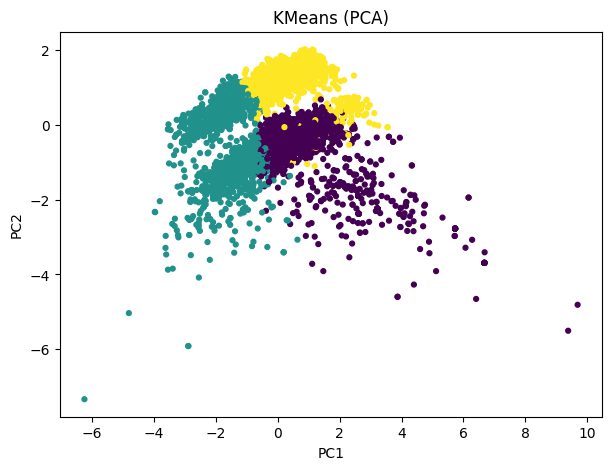

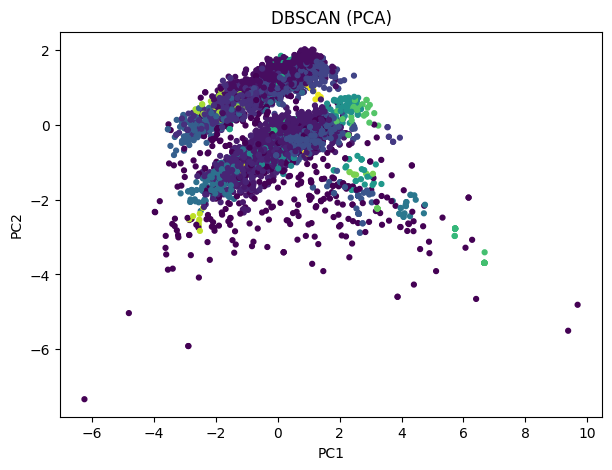

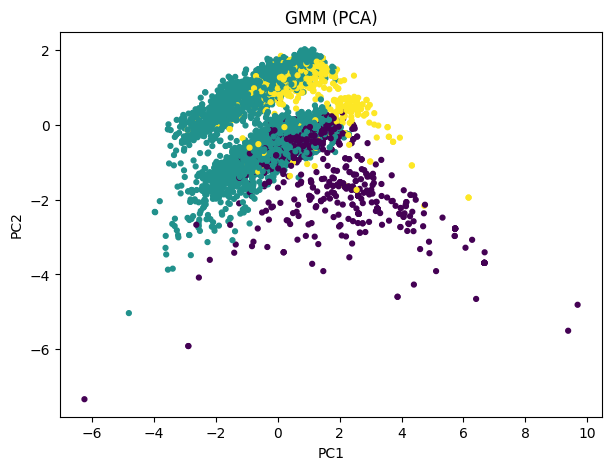

In [4]:
pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(X)

def plot_clusters(labels, title):
    plt.figure(figsize=(7,5))
    plt.scatter(X2[:,0], X2[:,1], c=labels, s=12)
    plt.title(title)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()

plot_clusters(k_labels, "KMeans (PCA)")
plot_clusters(d_labels, "DBSCAN (PCA)")
plot_clusters(g_labels, "GMM (PCA)")
